In [1]:
# dataset: https://www.dropbox.com/scl/fo/nz1j92xpr6eet3fa5mx5i/ADMYs2zfr3dvxJ-FFd5dmM8?rlkey=tem27v1d2raf2nnlcq6cd49ev&e=1&st=sty6ggo3&dl=0)

# 2. Compare and visualize the temporal variation in atmospheric mass density experienced by the two SWARM A satellite (one in Feb 2014 using swarma-wu016-20140314_to_20140317.csv and one in July 2018 using swarma-wu545-20180718_to_20180721.csv) during two distinct 3-day periods separated by several years.

Loading data from: ../data/STORM-AI/warmup/v2/Sat_Density/swarma-wu016-20140314_to_20140317.csv
  Peak density found: 1.329e-12 at 2014-03-14 13:50:00
Loading data from: ../data/STORM-AI/warmup/v2/Sat_Density/swarma-wu545-20180718_to_20180721.csv
  Peak density found: 1.767e-13 at 2018-07-20 21:30:00

--- Peak Density Comparison ---
Peak Density in Period 1 (swarma-wu016-20140314_to_20140317.csv): 1.329e-12
Peak Density in Period 2 (swarma-wu545-20180718_to_20180721.csv): 1.767e-13
Ratio (Peak 2 / Peak 1): 0.13
Peak density was 7.52 times higher in Period 1.

Generating visualization...


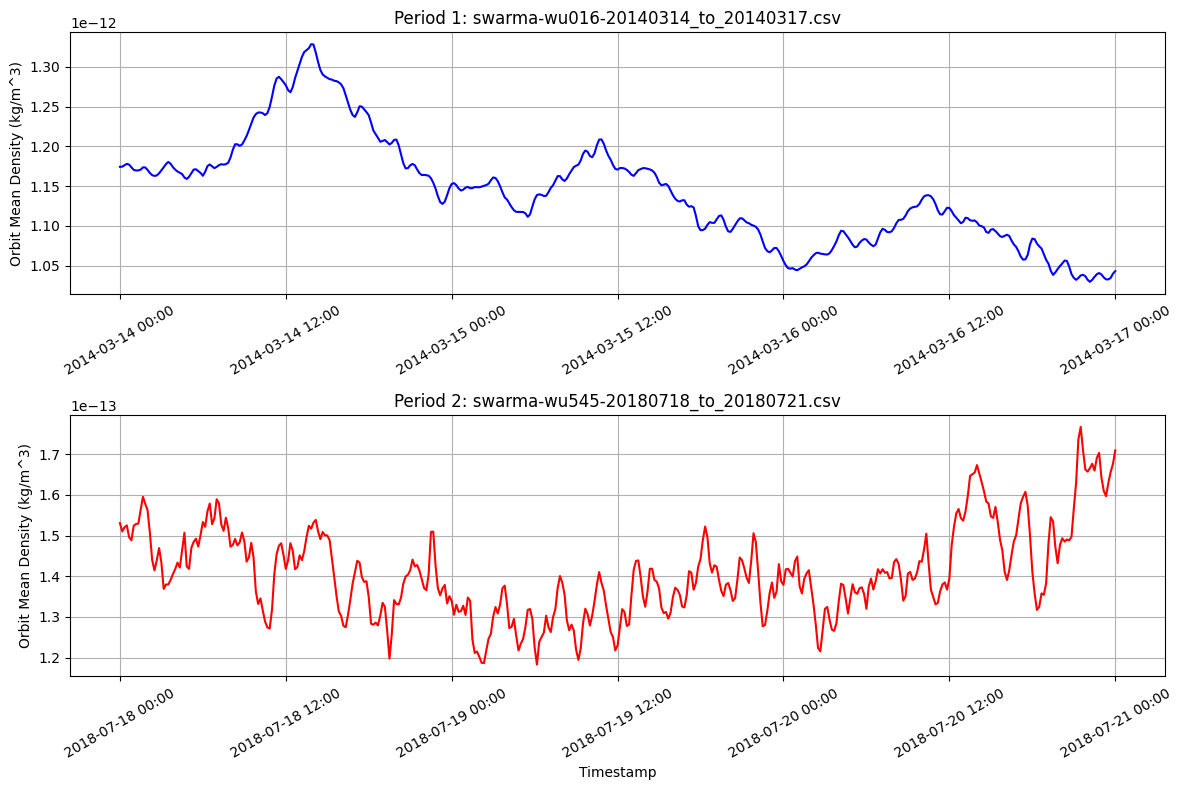

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy as np

# --- Configuration ---
BASE_DATA_DIR = '../data_local/STORM-AI/warmup/v2/'
DENSITY_DIR = os.path.join(BASE_DATA_DIR, 'Sat_Density/')

# Select two files from the list provided by the user
FILE_1_NAME = 'swarma-wu016-20140314_to_20140317.csv' # Example Period 1 (Feb 2014)
FILE_2_NAME = 'swarma-wu545-20180718_to_20180721.csv' # Example Period 2 (July 2018)

FILE_1_PATH = os.path.join(DENSITY_DIR, FILE_1_NAME)
FILE_2_PATH = os.path.join(DENSITY_DIR, FILE_2_NAME)

# Column names (VERIFY THESE FROM YOUR FILES)
DENSITY_COL = 'Orbit Mean Density (kg/m^3)'
TIME_COL = 'Timestamp'

# --- Function to Load and Find Peak ---
def find_peak_density(file_path, density_col_name, time_col_name):
    """Loads data and returns the peak density and the full dataframe."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    print(f"Loading data from: {file_path}")
    df = pd.read_csv(file_path, parse_dates=[time_col_name])
    df = df.sort_values(by=time_col_name)

    if density_col_name not in df.columns:
        raise ValueError(f"Density column '{density_col_name}' not found in {file_path}.")

    if df.empty:
        raise ValueError(f"No data loaded from {file_path}")

    peak_density = df[density_col_name].max()
    peak_time = df.loc[df[density_col_name].idxmax(), time_col_name]
    print(f"  Peak density found: {peak_density:.3e} at {peak_time}")
    return peak_density, df

# --- Load Data and Analyze ---
try:
    peak_1, df1 = find_peak_density(FILE_1_PATH, DENSITY_COL, TIME_COL)
    peak_2, df2 = find_peak_density(FILE_2_PATH, DENSITY_COL, TIME_COL)

    # --- Compare Peaks ---
    print(f"\n--- Peak Density Comparison ---")
    print(f"Peak Density in Period 1 ({FILE_1_NAME}): {peak_1:.3e}")
    print(f"Peak Density in Period 2 ({FILE_2_NAME}): {peak_2:.3e}")

    if peak_1 > 0: # Avoid division by zero if peak1 is zero or negative
      ratio = peak_2 / peak_1
      print(f"Ratio (Peak 2 / Peak 1): {ratio:.2f}")
      if ratio > 1:
          print(f"Peak density was {ratio:.2f} times higher in Period 2.")
      else:
          print(f"Peak density was {(1/ratio):.2f} times higher in Period 1.")
    else:
      print("Cannot calculate ratio as Peak 1 is zero or negative.")


    # --- Visualize (Optional) ---
    print("\nGenerating visualization...")
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False) # Separate x-axes

    # Plot Period 1
    axes[0].plot(df1[TIME_COL], df1[DENSITY_COL], color='blue')
    axes[0].set_title(f'Period 1: {FILE_1_NAME}')
    axes[0].set_ylabel(DENSITY_COL)
    axes[0].grid(True)
    axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    axes[0].tick_params(axis='x', rotation=30)

     # Plot Period 2
    axes[1].plot(df2[TIME_COL], df2[DENSITY_COL], color='red')
    axes[1].set_title(f'Period 2: {FILE_2_NAME}')
    axes[1].set_ylabel(DENSITY_COL)
    axes[1].set_xlabel('Timestamp')
    axes[1].grid(True)
    axes[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    axes[1].tick_params(axis='x', rotation=30)

    fig.tight_layout()
    plt.show()


except FileNotFoundError as fnf_error:
    print(f"ERROR: {fnf_error} - Please ensure file names and paths are correct.")
except ValueError as ve:
    print(f"ERROR: Data processing error - {ve}")
except KeyError as ke:
    print(f"ERROR: Column name not found - {ke}. Please verify column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")